In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git
import gensim#For word2vec, etc

import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import seaborn as sns#Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import datetime as dt
import random

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('full.csv')

In [3]:
df = df[['title', 'text', 'time', 'ym', 'score', 'num_comments', 'gme']]
df.head()

,title,text,time,ym,score,num_comments,gme
0,WSBVoteBot Log for Oct 01 2020,Every time a new submission is posted to walls...,2020-10-01,202010,5,18,0
1,call expiring 10/2,[removed],2020-10-01,202010,1,0,0
2,Warren Buffett UNCHARMED B.H. DD inside,[removed],2020-10-01,202010,0,4,0
3,Thrown out of r/Stocks for saying I prefer FAA...,[deleted],2020-10-01,202010,1,0,0
4,What would you retards do?,NaN,2020-10-01,202010,1,0,0


In [4]:
def na_value(x):
    if type(x) == float:
        return ''
    else:
        return x

df['title'] = df['title'].apply(na_value)

np.sum(df['title'].apply(lambda x: type(x) == float))

0

In [5]:
%%time
df['tokenized_text'] = df['title'].apply(lambda x: lucem_illud.word_tokenize(x))
df['normalized_tokens'] = df['title'].apply(lambda x: lucem_illud.normalizeTokens(x))

CPU times: user 5min 24s, sys: 16.2 s, total: 5min 40s
Wall time: 7min 4s


In [6]:
df['tokenized_texts'] = df['tokenized_text'].apply(lambda x: [x])
df['normalized_texts'] = df['normalized_tokens'].apply(lambda x: [x])

In [7]:
df_1 = df[df['ym']<202101]
df_2 = df[df['ym']>=202101]
df_2 = df_2[df_2['ym']<202104]
df_3 = df[df['ym']>=202104]

# `GME W2V`

In [121]:
gme = df[df['gme']==1]

In [122]:
gme.head()

,title,text,time,ym,score,num_comments,gme,tokenized_text,normalized_tokens,tokenized_texts,normalized_texts
144,REGGIE IS WITH US GME HOLDERS,[removed],2020-10-01,202010,1,1,1,"[REGGIE, IS, WITH, US, GME, HOLDERS]","[reggie, gme, holder]","[[REGGIE, IS, WITH, US, GME, HOLDERS]]","[[reggie, gme, holder]]"
239,GameStop Pump?,[deleted],2020-10-01,202010,12,14,1,"[GameStop, Pump]","[gamestop, pump]","[[GameStop, Pump]]","[[gamestop, pump]]"
277,GME More information on Ryan Cohen,\n\nCredit for this information goes to Just...,2020-10-01,202010,37,26,1,"[GME, More, information, on, Ryan, Cohen]","[gme, information, ryan, cohen]","[[GME, More, information, on, Ryan, Cohen]]","[[gme, information, ryan, cohen]]"
702,What the fuck is going on with GME?,**Original Post:**\n\n>!Can we get an actual d...,2020-10-02,202010,59,122,1,"[What, the, fuck, is, going, on, with, GME]","[fuck, go, gme]","[[What, the, fuck, is, going, on, with, GME]]","[[fuck, go, gme]]"
1302,Gamestop Losses ---Still HOLDR with Diamond ha...,[deleted],2020-10-03,202010,36,83,1,"[Gamestop, Losses, ---Still, HOLDR, with, Diam...","[gamestop, loss, ---still, holdr, diamond, hand]","[[Gamestop, Losses, ---Still, HOLDR, with, Dia...","[[gamestop, loss, ---still, holdr, diamond, ha..."


In [123]:
%%time
W2V_gme = gensim.models.word2vec.Word2Vec(gme['normalized_texts'].sum(), sg=0)

CPU times: user 8min 59s, sys: 12.7 s, total: 9min 11s
Wall time: 9min 45s


In [186]:
numWords = 60
targetWords = W2V_gme.wv.index2word[:numWords]

In [187]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(W2V_gme[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.32147622, -0.08278619,  0.43025297, ..., -0.08906323,
        -0.2118545 , -0.19039042],
       [-1.7570665 ,  1.6605484 ,  0.04754155, ...,  0.43390673,
         0.9441768 , -1.1542293 ],
       [ 0.07776286, -0.442557  ,  0.45298263, ...,  1.1326681 ,
        -0.07330044, -0.50413793],
       ...,
       [ 0.8623421 , -0.6167868 ,  0.26313615, ...,  0.43626508,
        -0.1965517 ,  0.27880946],
       [-0.31808612, -0.5582547 ,  0.01866594, ..., -0.8328075 ,
        -0.65827876,  0.07133321],
       [-0.39970896,  0.5298294 ,  1.0586075 , ...,  1.665585  ,
        -0.633104  , -0.25174248]], dtype=float32)

In [188]:
pcaWords = sklearn.decomposition.PCA(n_components = 60).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

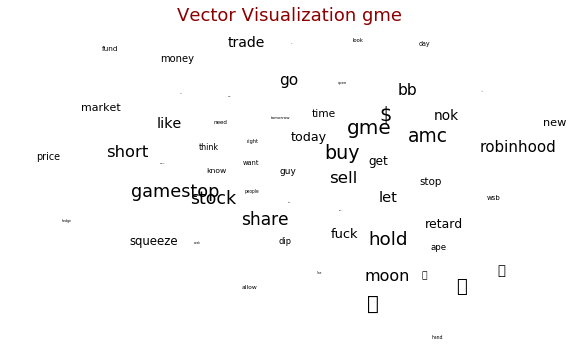

In [189]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization gme', size = 18, color = "darkred")
plt.xticks(())
plt.yticks(())
plt.savefig('w2v_tsne_gme.jpg')
plt.show()

In [136]:
Trend = dimension(W2V_gme, ['increase','soar', 'rise', 'raise', 'rocket', 'good', 'great', 'up'], 
                  ['decline', 'cut', 'drop', 'recession', 'dip', 'bad', 'flop', 'down'])
Attitude = dimension(W2V_gme, ['crazy','urgent', 'mad', 'rush'], ['reason', 'rational', 'analysis', 'chill', 'calm'])
Trust = dimension(W2V_gme, ['trust', 'believe', 'true', 'real', 'honest', 'sure'], 
                  ['fake', 'confuse', 'fraud', 'fool', 'doubt'])

In [132]:
Companies = ['apple', 'boeing', 'facebook', 'google', 'gm', 'amazon', 'amc', 'gamestop', 'microsoft', 'tesla']
participants = ['investor', 'analyst', 'fund', 'bank', 'government', 'reddit', 'news', 'jpmorgan', 'youtuber']

In [133]:
Comdf = makeDF(W2V3, Companies) 
Pardf = makeDF(W2V3, participants)

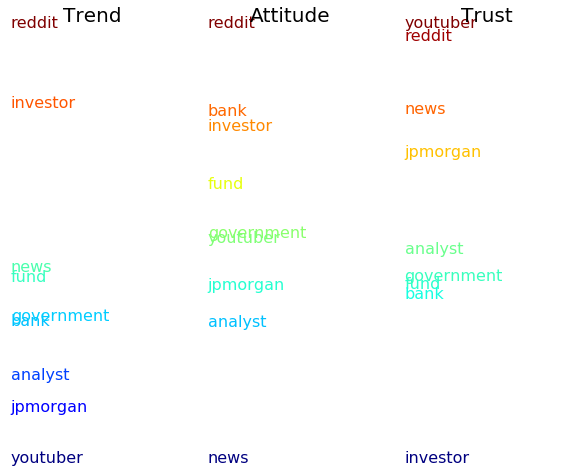

In [142]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Pardf, 'Trend')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Pardf, 'Attitude')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Pardf, 'Trust')
plt.savefig('dim_proj_gme_par.jpg')
plt.show()

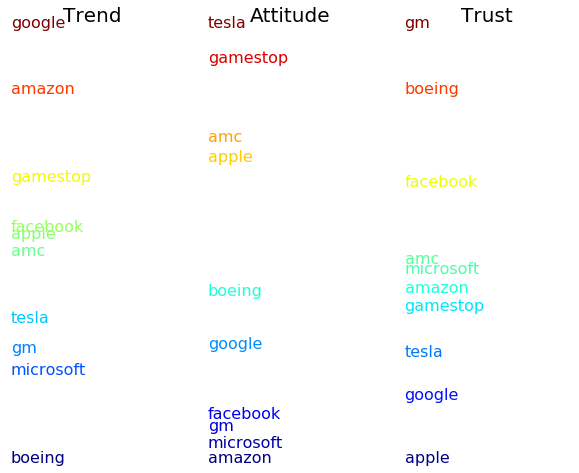

In [143]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Comdf, 'Trend')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Comdf, 'Attitude')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Comdf, 'Trust')
plt.savefig('dim_proj_rb_com.jpg')
plt.show()

In [144]:
import copy 

def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [145]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [146]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [152]:
rawEmbeddings, comparedEmbeddings = compareModels(gme, 'ym', text_column_name='normalized_texts')

In [153]:
rawEmbeddings.keys()

dict_keys([202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106])

In [157]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

gamestop


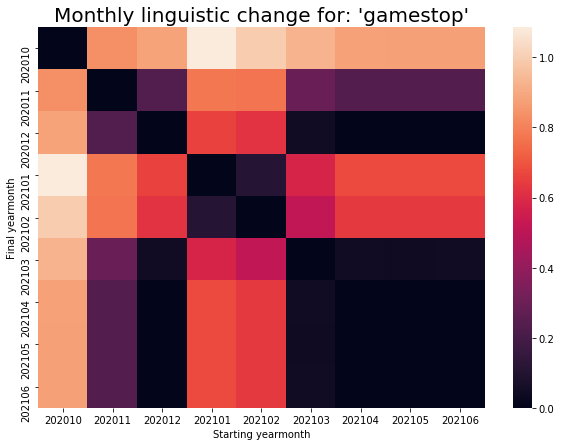

In [181]:
targetWord = 'gamestop'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting yearmonth")
ax.set_ylabel("Final yearmonth")
ax.set_title("Monthly linguistic change for: '{}'".format(targetWord), fontsize = 20)
plt.show()

gme


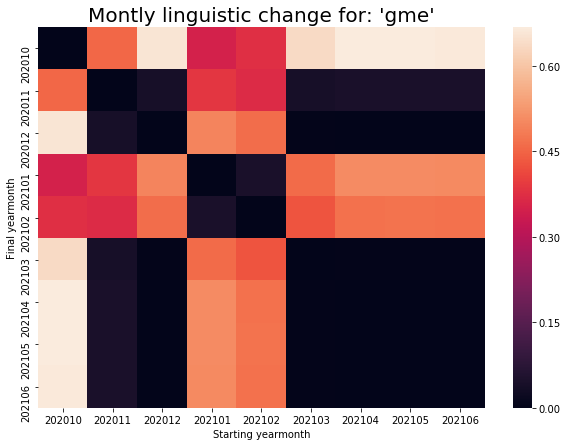

In [179]:
targetWord = 'gme'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting yearmonth")
ax.set_ylabel("Final yearmonth")
ax.set_title("Montly linguistic change for: '{}'".format(targetWord), fontsize = 20)
plt.show()